# Exercise 3.5

## Generate AR(1) processes with different methods using the same white noise

(i) Write functions to calculate the AR(1) by:
- Using iterative autoregressive(I) formulation
- Moving average formulation
- Moving average formualtion assuming a cyclical boundary conditions
- Using a function provided by a library

(ii) Plot these functions each for a negative and a positiv alpha and explain in words what the result is like.

Tipp:   
As a function from a library you can use "arma_generate_sample" from the statsmodels library  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html  
Set the coefficient for moving-average lag polynomial to [1,0]  
To pass the predefined white noise write a function with an argument size but only return your white noise without using the argument size.  


In [29]:
import sys
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import det, inv, eig
import statsmodels.api as sm
import statsmodels.tsa.arima_process as ap

In [6]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

iterative autoregressive(I) formulation

In [133]:
# WHITE NOISE PARAMS
mu=0
sigma=5
nt=500 #  n of samples
# GENERATE WHITE NOISE
WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
def rngen(size):
    return WN_arr

In [162]:
x0=WN_arr[0]
alpha=0.3

x_arr  = np.zeros(nt)
# set initial x
x_arr[0] = x0
# from 2nd to the last month    
for i in range(1,nt):
        x_arr[i] = alpha*x_arr[i-1]+WN_arr[i]

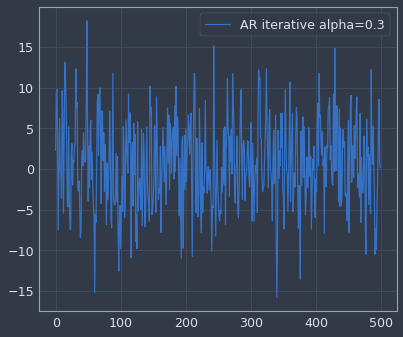

In [153]:
plt.plot(x_arr,label=f'AR iterative alpha={alpha}')
plt.legend();

Using a function provided by a library

Set the coefficient for moving-average lag polynomial to [1,0]  
To pass the predefined white noise write a function with an argument size but only return your white noise without using the argument size.  m

In [73]:
ap.arma_generate_sample?

In [107]:
# moving average parameters
maparams =  np.array([1.0])
maparams

array([1.])

In [148]:
# AR parameters
ncoeff=2
alpha=0.3
arparams =  np.array([alpha])
arparams

array([0.3])

In [149]:
ar = np.r_[1, -arparams] # add zero-lag and negate
# ma = np.r_[1, maparams] # add zero-lag
ma=[1,0]
ar,ma

(array([ 1. , -0.3]), [1, 0])

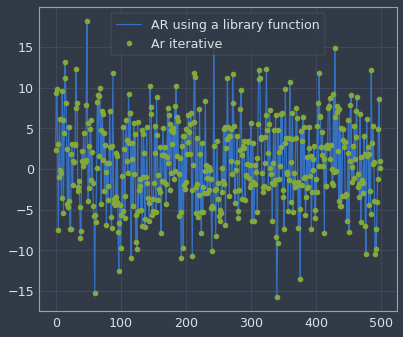

In [166]:
y = sm.tsa.arma_generate_sample(ar, ma, 500,distrvs=rngen)
plt.plot(y,label='AR using a library function')
plt.plot(x_arr,'o',label='Ar iterative')
plt.legend();

Moving average formulation

In [127]:
nt

500

In [211]:
x0=1
alpha=0.3

x_arr_ma  = np.zeros(nt)
# set initial x
MA_arr=np.zeros(nt)
for t in range(0,nt):
    # adjust the k at every timestep
    
    for k in range(0,t+1):
            MA_arr[k] = (alpha**k)*WN_arr[t-k]
    x_arr_ma[t]=sum(MA_arr)

In [ ]:
%whos

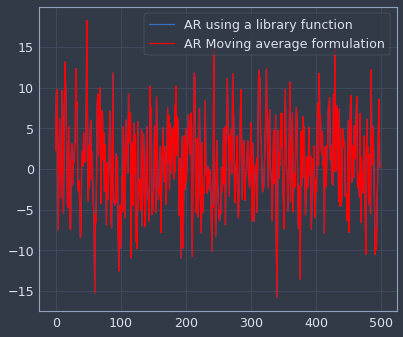

In [213]:
y = sm.tsa.arma_generate_sample(ar, ma, 500,distrvs=rngen)
plt.plot(y,label='AR using a library function')
plt.plot(x_arr,label='AR iterative')
plt.plot(x_arr_ma,color='red',label='AR Moving average formulation')
plt.legend();

In [216]:
x0=1
alpha=0.3

x_arr_bc  = np.zeros(nt)
# set initial x
nk=len(WN_arr)
MA_arr=np.zeros(nk)
for t in range(0,nt):
    
    for k in range(0,nt):
            MA_arr[k] = (alpha**k)*WN_arr[t-k]
    x_arr_bc[t]=sum(MA_arr)

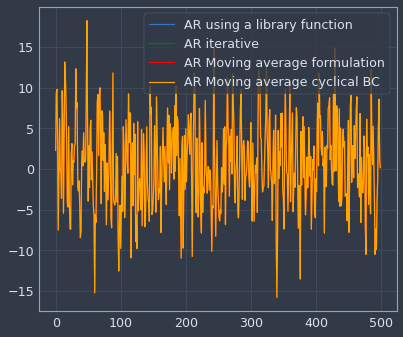

In [217]:
y = sm.tsa.arma_generate_sample(ar, ma, 500,distrvs=rngen)
plt.plot(y,label='AR using a library function')
plt.plot(x_arr,color='green',label='AR iterative')
plt.plot(x_arr_ma,color='red',label='AR Moving average formulation')
plt.plot(x_arr_ma,color='orange',label='AR Moving average cyclical BC')
plt.legend();

In [178]:
t=2
k=20
WN_arr[t-k]


3.090658270144232

# Homework

Get the papers shown in the lecture and read them. Also choose papers you would like to make a presentation about. Pick 2 of them in case that one specific paper is chosen multiple times.